# CREDIT CARD FRAUD DETECTION

Importing Modules

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing Data

In [11]:
train = pd.read_csv('fraudTest.csv')
test = pd.read_csv('fraudTrain.csv')
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [12]:
print(test.shape),print(train.shape)

(1296675, 23)
(555719, 23)


(None, None)

Data Cleaning

In [13]:
test.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [14]:
train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [15]:
test.info(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

(None, None)

Creating a new 'trans_date' column from the existing dob,trans_date_trans_time in both test And train

In [16]:
train['trans_date_trans_time']=pd.to_datetime(train['trans_date_trans_time'])
train['trans_date']=train['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
train['trans_date']=pd.to_datetime(train['trans_date'])
train['dob']=pd.to_datetime(train['dob'])

test['trans_date_trans_time']=pd.to_datetime(test['trans_date_trans_time'])
test['trans_date']=test['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
test['trans_date']=pd.to_datetime(test['trans_date'])
test['dob']=pd.to_datetime(test['dob'])

In [17]:
(test.trans_date.head(),test.dob.head(),
train.trans_date.head(),train.dob.head())

(0   2019-01-01
 1   2019-01-01
 2   2019-01-01
 3   2019-01-01
 4   2019-01-01
 Name: trans_date, dtype: datetime64[ns],
 0   1988-03-09
 1   1978-06-21
 2   1962-01-19
 3   1967-01-12
 4   1986-03-28
 Name: dob, dtype: datetime64[ns],
 0   2020-06-21
 1   2020-06-21
 2   2020-06-21
 3   2020-06-21
 4   2020-06-21
 Name: trans_date, dtype: datetime64[ns],
 0   1968-03-19
 1   1990-01-17
 2   1970-10-21
 3   1987-07-25
 4   1955-07-06
 Name: dob, dtype: datetime64[ns])

Removing the unamed column as it is unnesesary

In [18]:
train.drop("Unnamed: 0",axis=1,inplace=True)
test.drop("Unnamed: 0",axis=1,inplace=True)
train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2020-06-21
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2020-06-21
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2020-06-21
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2020-06-21
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2020-06-21


EDA

Categorical Variable Analysis

In [19]:
total = pd.concat([test,train])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   first                  object        
 6   last                   object        
 7   gender                 object        
 8   street                 object        
 9   city                   object        
 10  state                  object        
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    object        
 16  dob                    datetime64[ns]
 17  trans_num              object        
 18  unix_time              

In [20]:
total["is_fraud_cat"]=total.is_fraud.apply(lambda x: "T" if x==1 else "F")
total["is_fraud_cat"].astype("object")

0         F
1         F
2         F
3         F
4         F
         ..
555714    F
555715    F
555716    F
555717    F
555718    F
Name: is_fraud_cat, Length: 1852394, dtype: object

In [21]:
totalcat=total.select_dtypes(include=['object'])

In [22]:
total[totalcat.columns]

,merchant,category,first,last,gender,street,city,state,job,trans_num,is_fraud_cat
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9,F
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99,F
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,F
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,6b849c168bdad6f867558c3793159a81,F
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,F
...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,Michael,Olson,M,558 Michael Estates,Luray,MO,Town planner,9b1f753c79894c9f4b71f04581835ada,F
555715,fraud_Hoppe-Parisian,kids_pets,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,Futures trader,2090647dac2c89a1d86c514c427f5b91,F
555716,fraud_Rau-Robel,kids_pets,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,Musician,6c5b7c8add471975aa0fec023b2e8408,F
555717,fraud_Breitenberg LLC,travel,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,Cartographer,14392d723bb7737606b2700ac791b7aa,F


In [23]:
print(total[total['is_fraud_cat']=="T"].category)


2449        grocery_pos
2472      gas_transport
2523        grocery_pos
2546      gas_transport
2553        grocery_pos
              ...      
517197     shopping_pos
517274     shopping_pos
517341     shopping_net
517529      grocery_pos
517571         misc_net
Name: category, Length: 9651, dtype: object


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [28]:
print(total['is_fraud_cat'].value_counts())

T    4
F    2
Name: is_fraud_cat, dtype: int64


Ploting the histogram, countplot and box plot for the Amount

Histogram of 'amt'

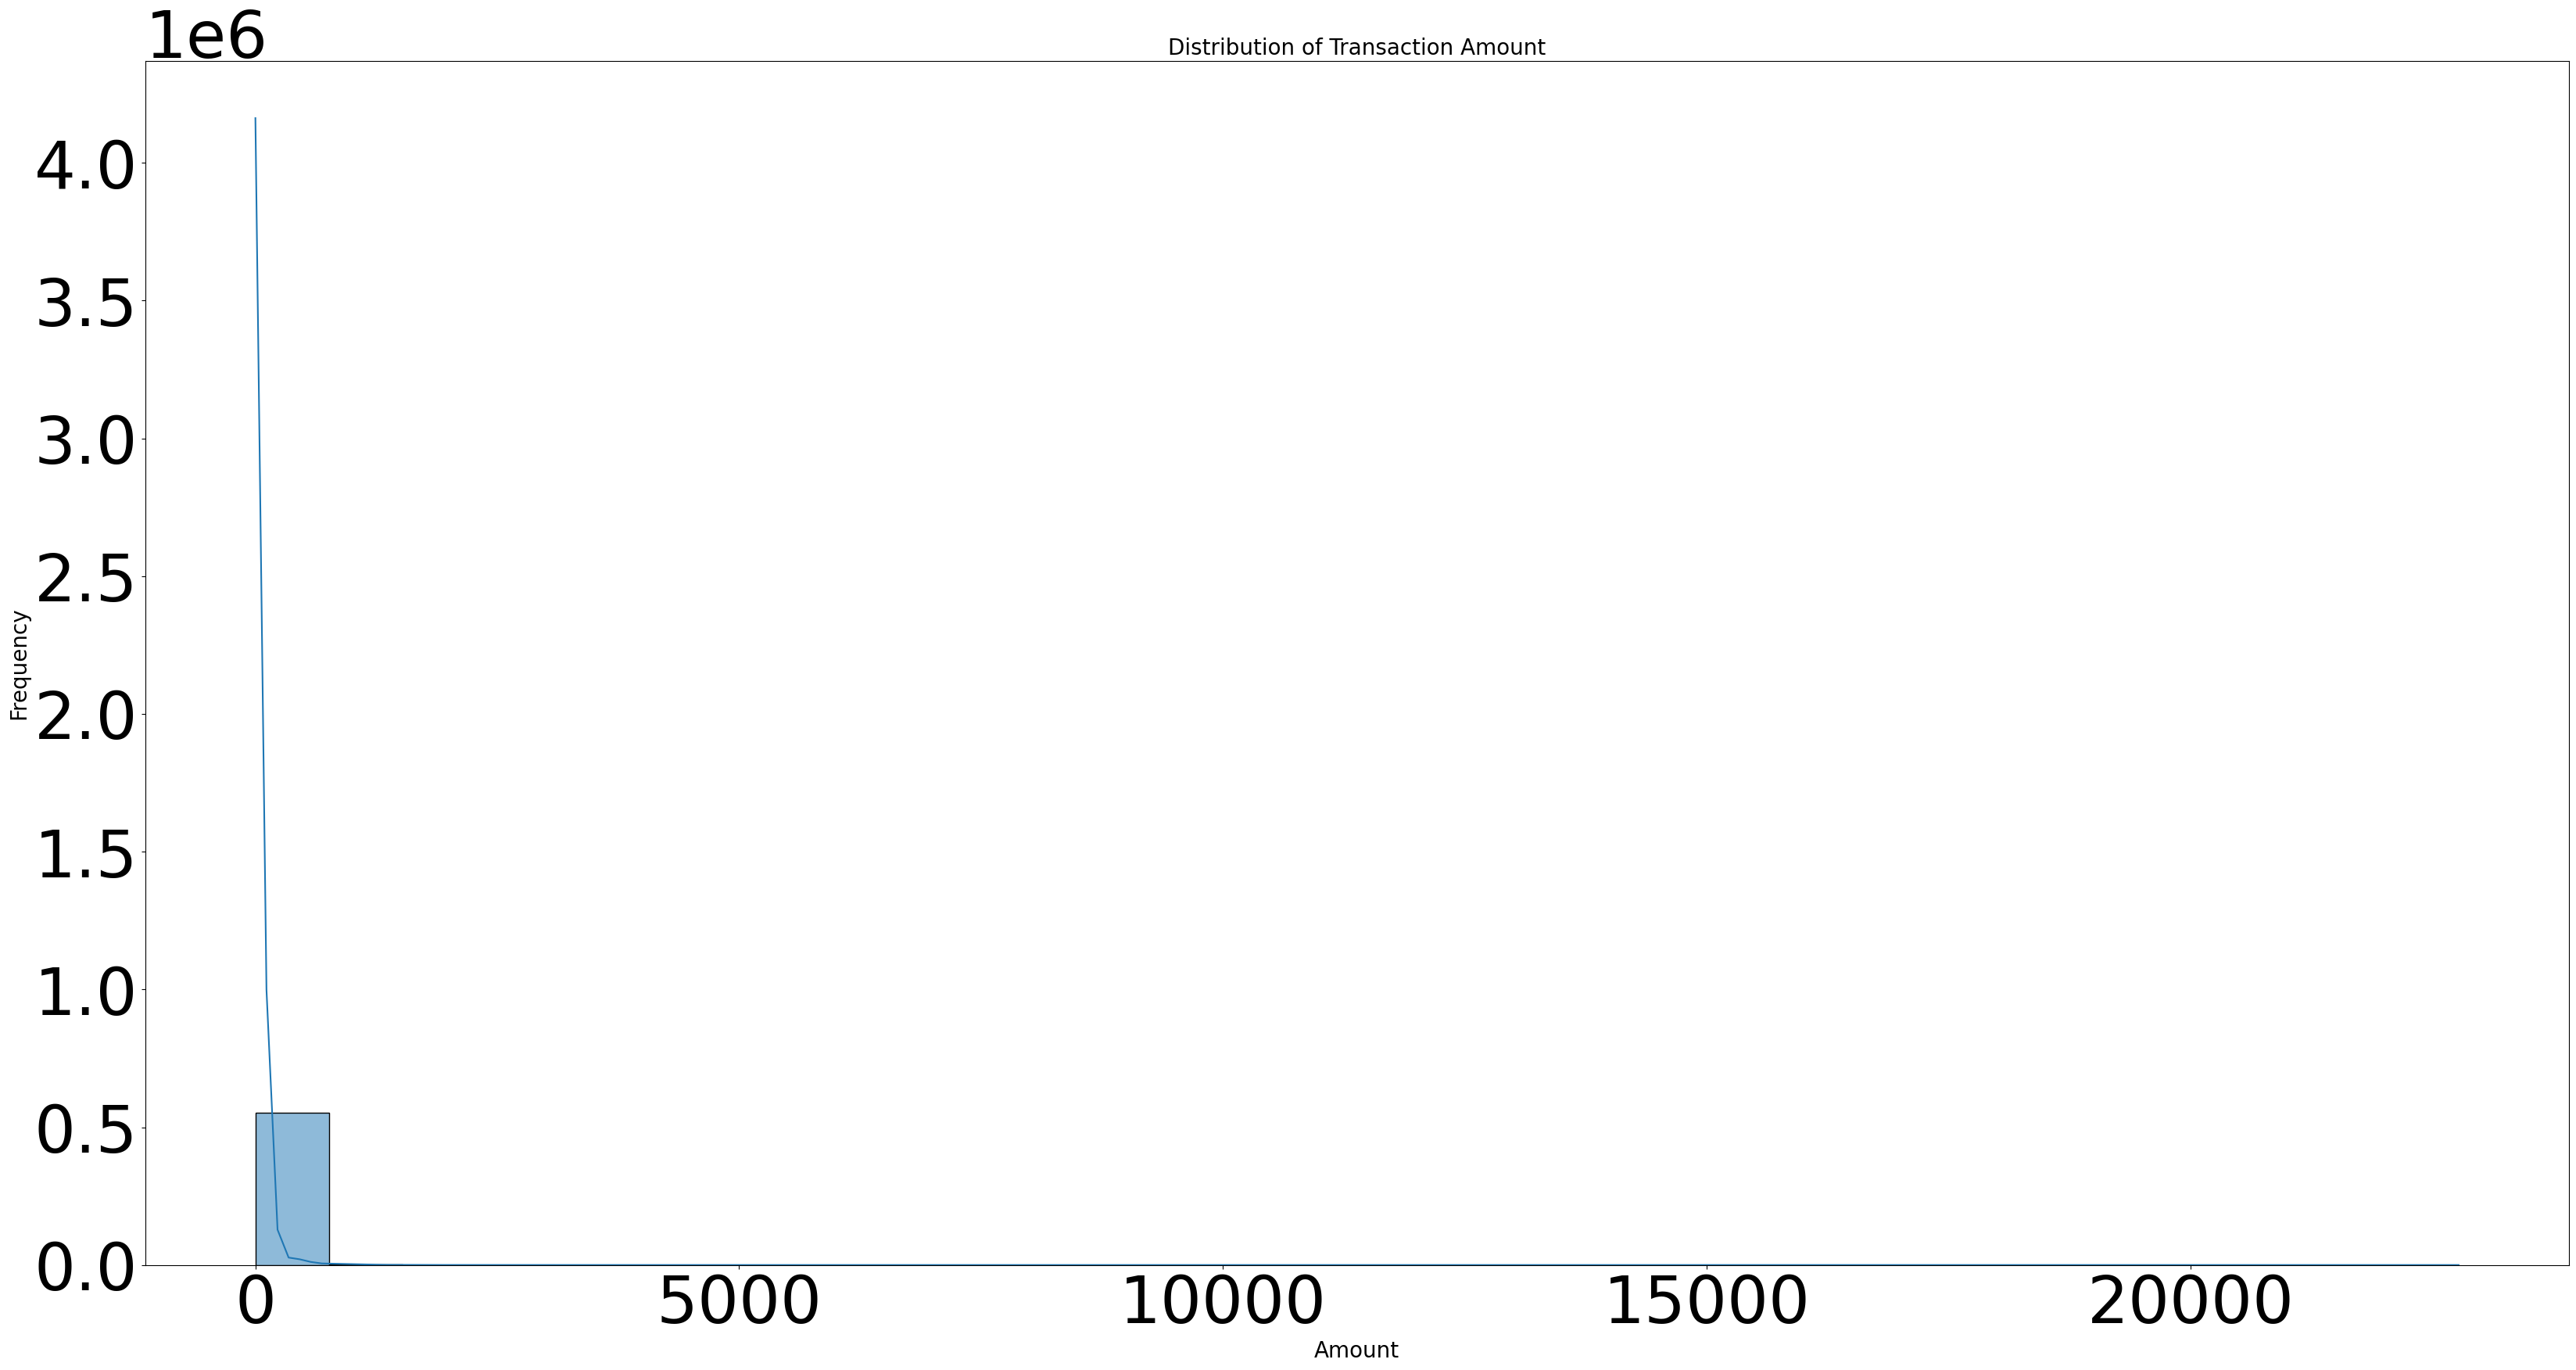

In [68]:
plt.figure(figsize=(40,20))
sns.histplot(train['amt'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount',fontsize=20)
plt.xlabel('Amount',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.show()

Count plot of 'Zip' with the top 11 zip codes

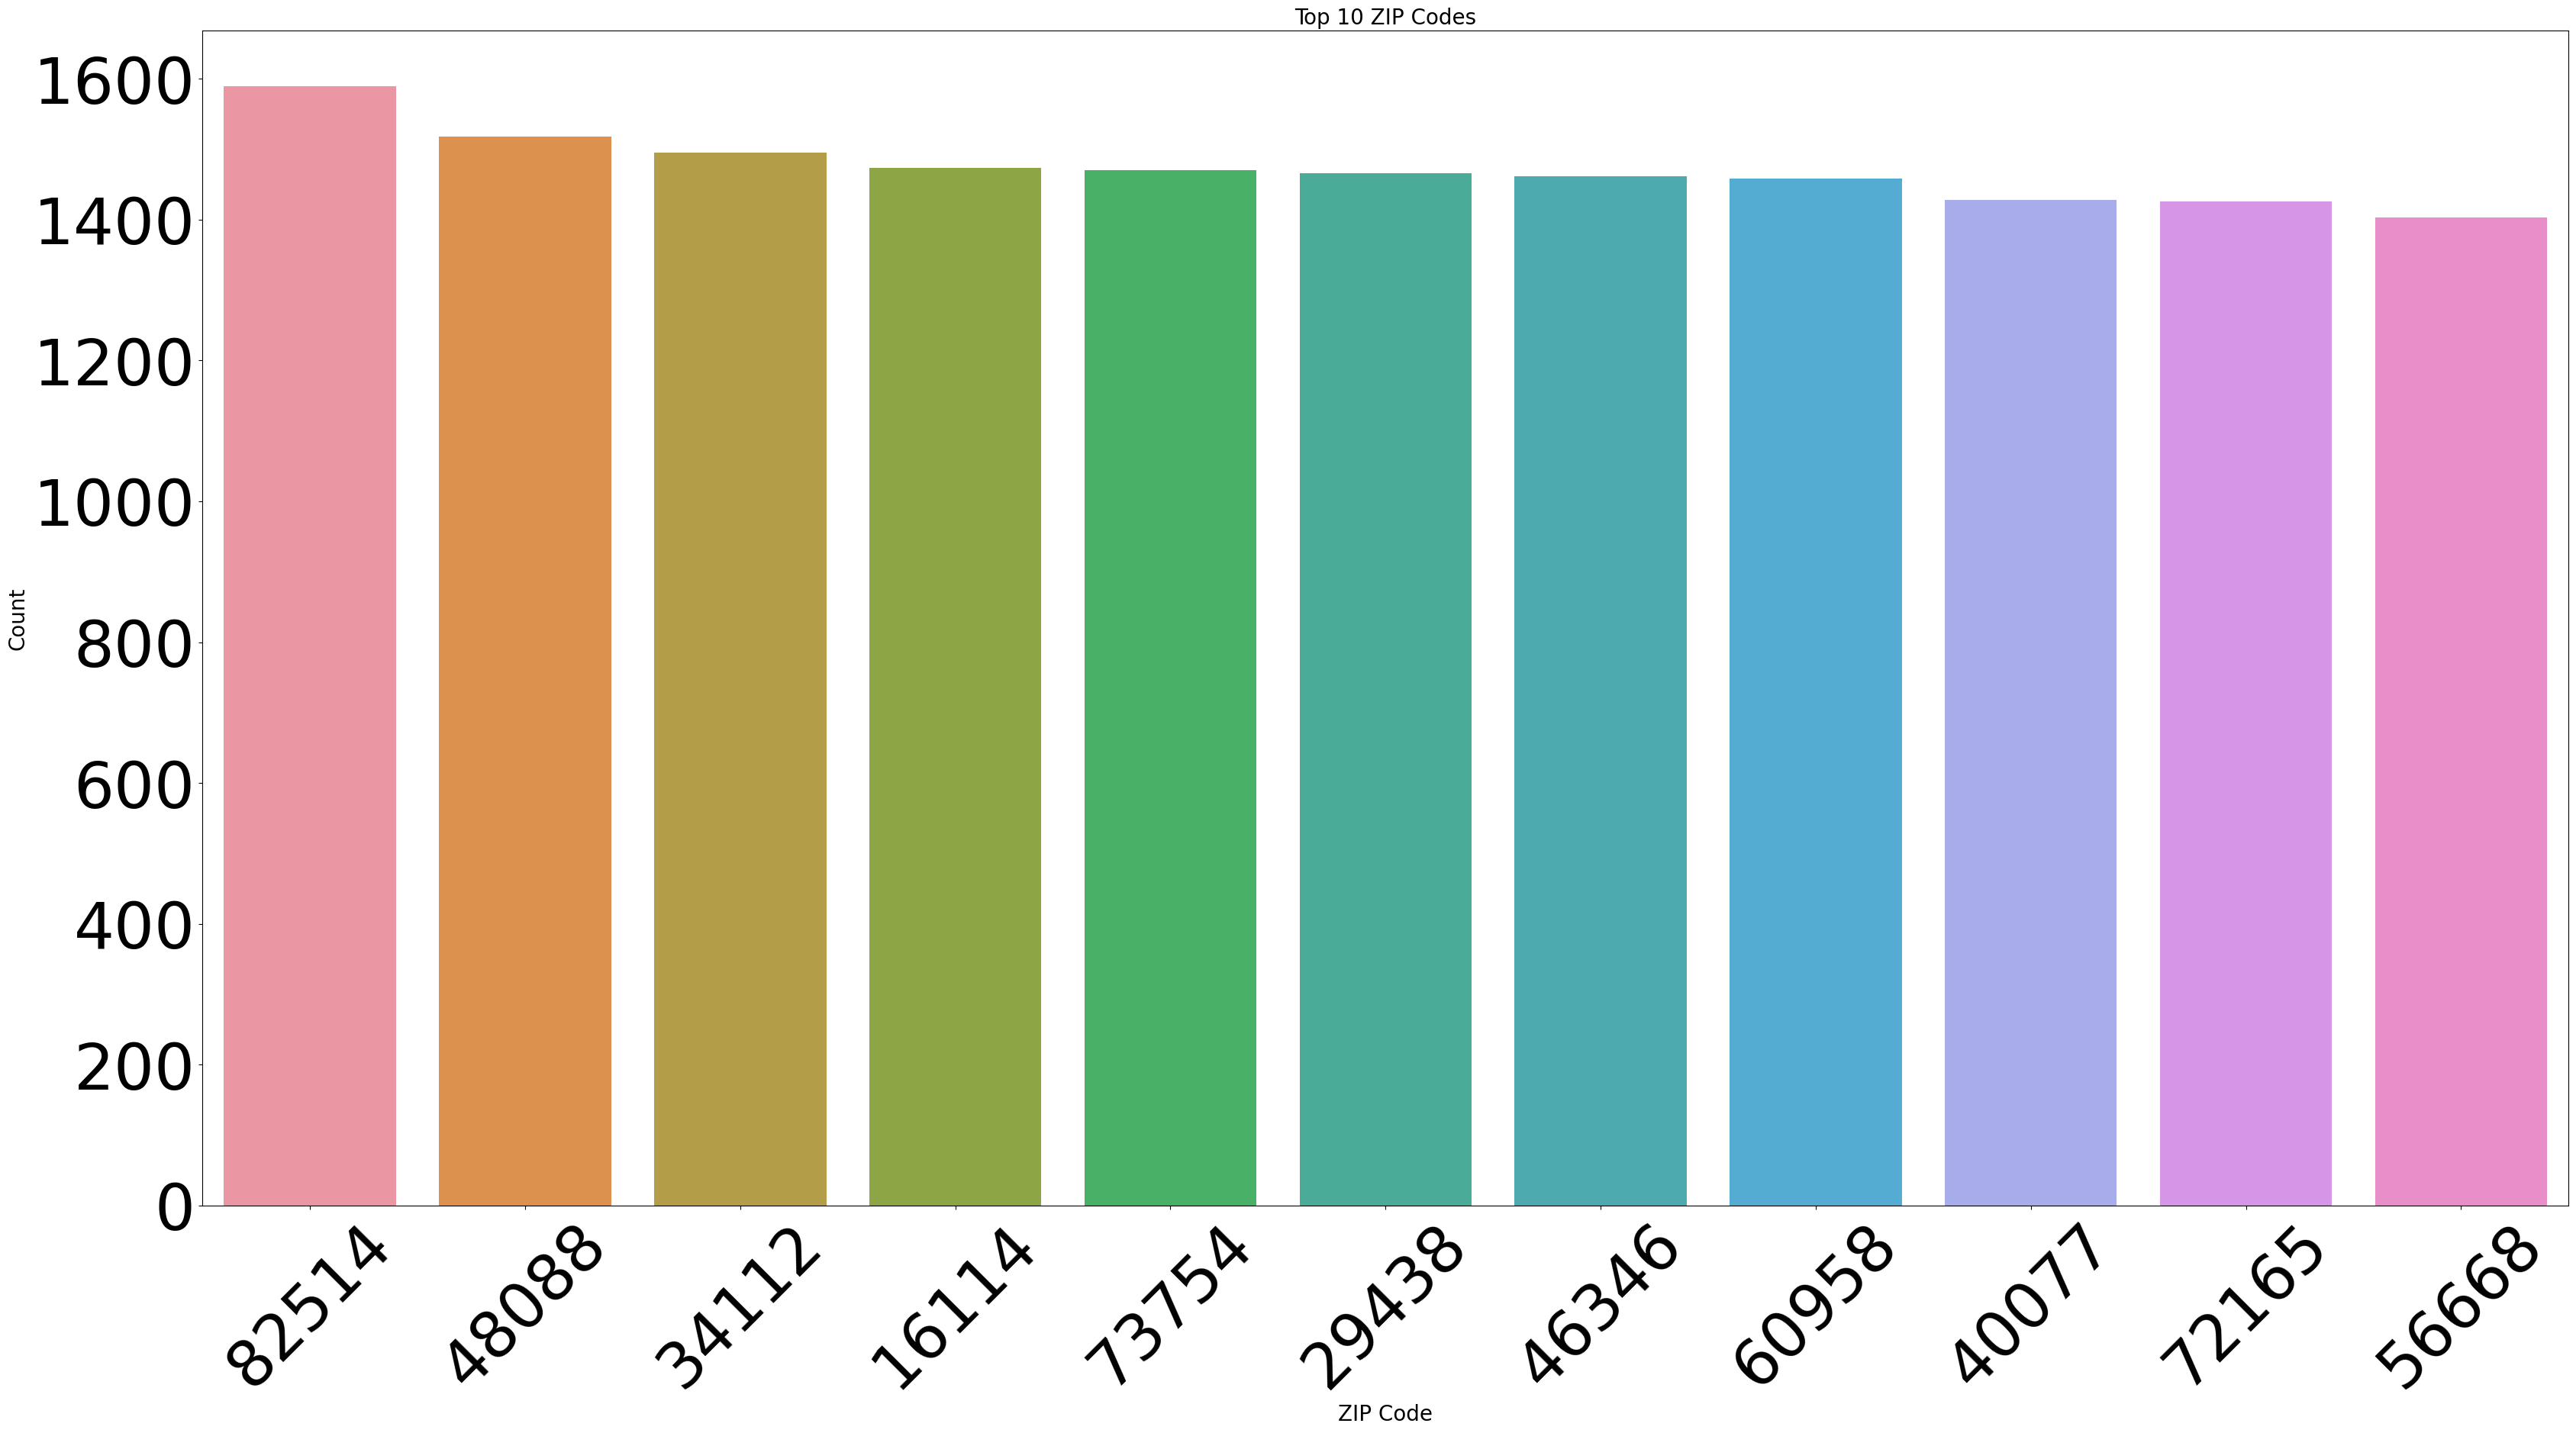

In [69]:
top_zip_codes = train['zip'].value_counts().head(11).index
plt.figure(figsize=(40,20))
sns.countplot(x='zip', data=train[train['zip'].isin(top_zip_codes)], order=top_zip_codes)
plt.title('Top 10 ZIP Codes', fontsize=20)
plt.xlabel('ZIP Code', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(rotation=45)
plt.show()

Box plot of 'city_pop' with 'is_fraud' as hue

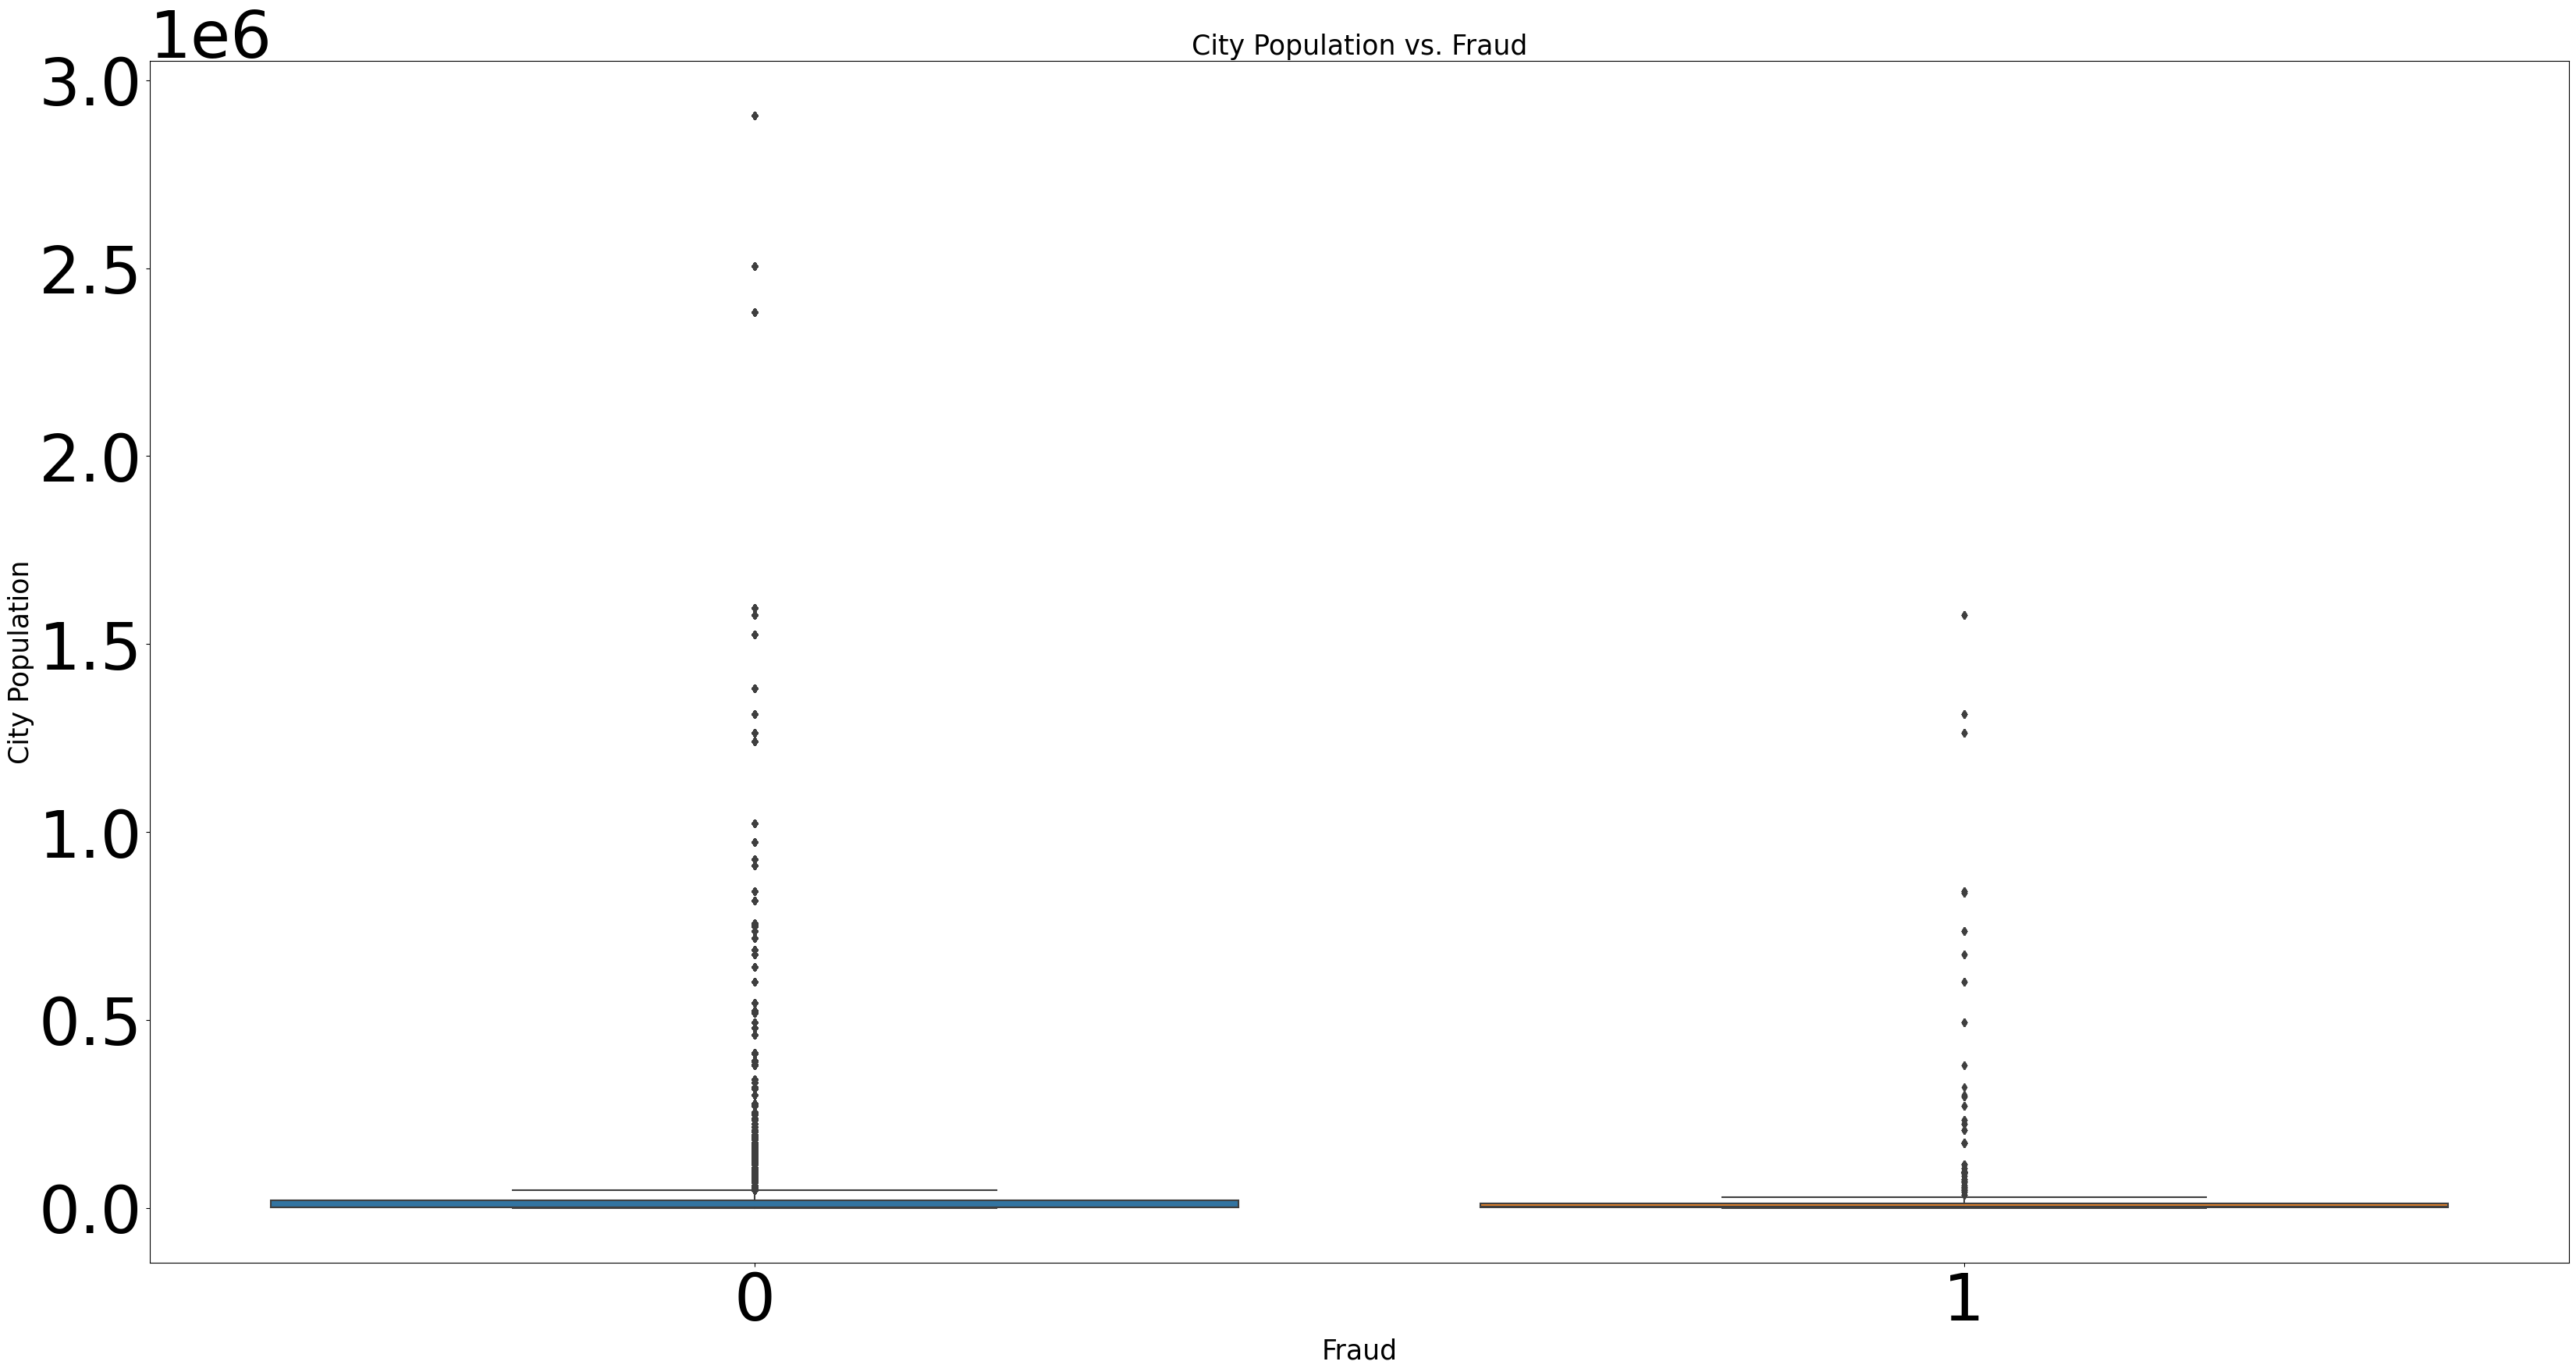

In [70]:
plt.figure(figsize=(40, 20))
sns.boxplot(x='is_fraud', y='city_pop', data=train)
plt.title('City Population vs. Fraud',fontsize=25)
plt.xlabel('Fraud',fontsize=25)
plt.ylabel('City Population',fontsize=25)
plt.show()

Correlation heatmap

C:\Users\HP\AppData\Local\Temp\ipykernel_10400\3828684984.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


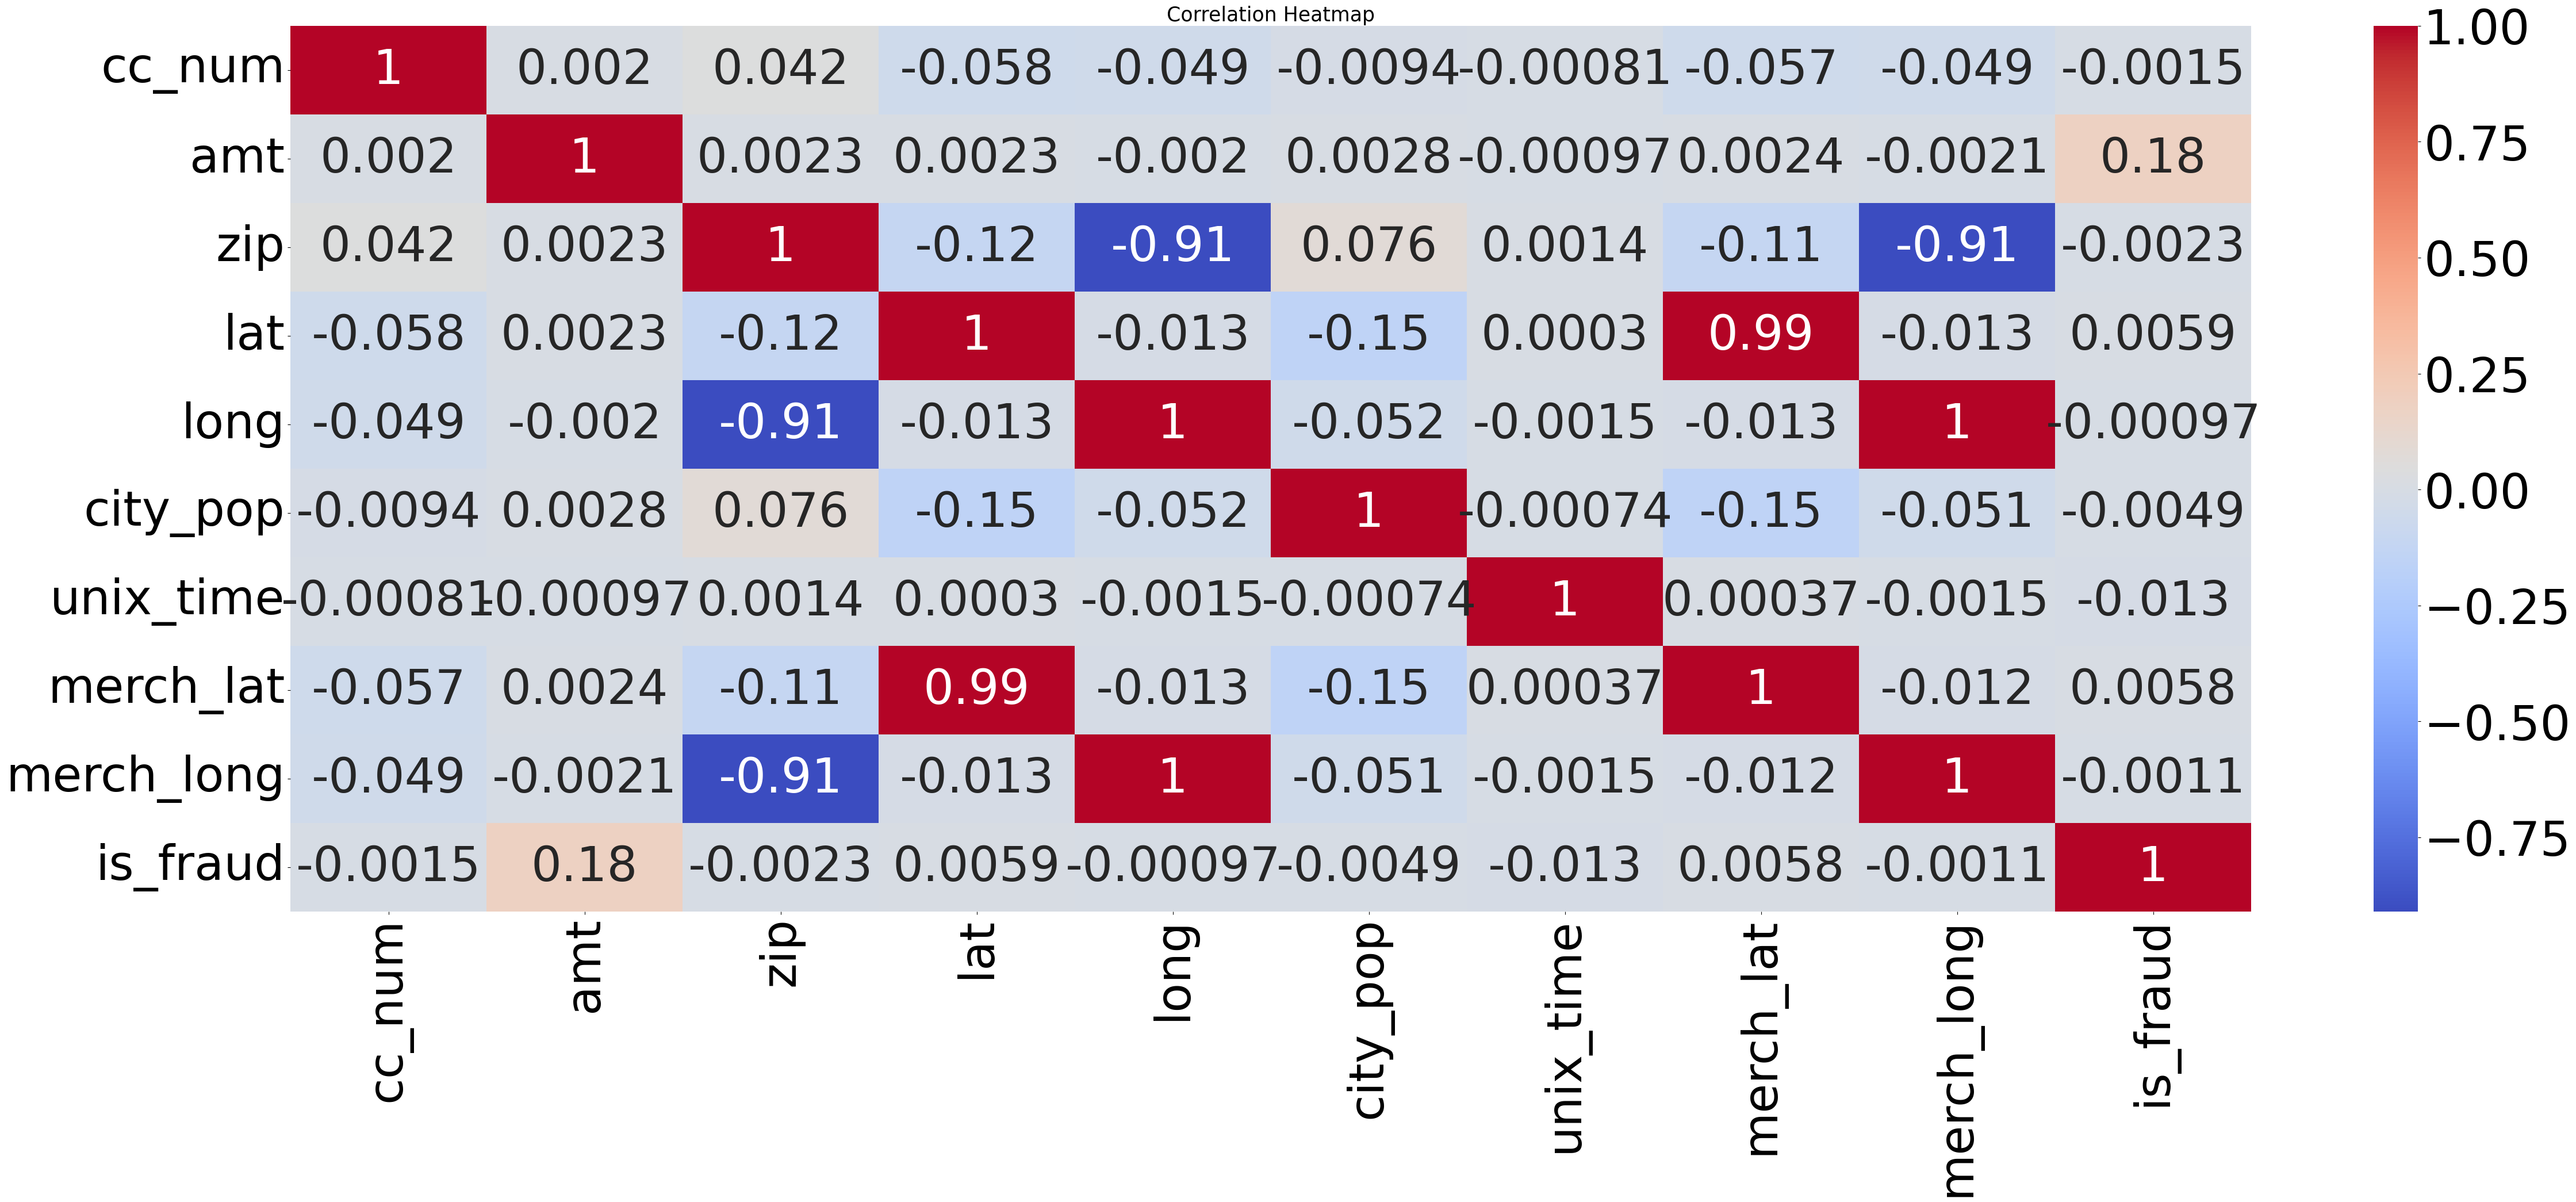

In [71]:
plt.figure(figsize=(55,20))
correlation_matrix = train.corr()
fontsize=15
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=25)
plt.show()

In [72]:
# filling the missing value
train.fillna(-999, inplace=True)
test.fillna(-999, inplace=True)

In [73]:
features = ['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
X = train[features]
y = train['is_fraud']

# Random Forest Model

In [74]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Building and training it

In [75]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluating the model

In [76]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.87      0.49      0.63       426

    accuracy                           1.00    111144
   macro avg       0.94      0.75      0.81    111144
weighted avg       1.00      1.00      1.00    111144



In [77]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00
